## Name: Neil Sanjiv Punjani, Student Number: 1010615381
*MIE1624: Assignment 3 Code*



# Installing packages and importing Necessary Libraries

### Import Python libraries

In [123]:
#Installing Necessary Libraries
!pip install OpenAI
!pip install NLTK

In [124]:
#Importing Necessary Libraries
import re
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import numpy as np
import pandas as pd
import os
import requests
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch
from scipy import zeros as sci_zeros
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import ClusterWarning
from warnings import simplefilter
simplefilter("ignore", ClusterWarning)
import seaborn as sns
import openai
from nltk import everygrams
import matplotlib.colors as mcolors
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from google.colab import files
import io


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Compiling and Cleaning our Scraped Data into 1 File

In [125]:
#Original Files Being Read for each Job Posting
'''
ML_consul = pd.read_csv('ML_consul.csv')
ML_engin = pd.read_csv('ML_engin.csv')
bus_int_analy = pd.read_csv('bus_int_analy.csv')
chief_analy = pd.read        _csv('chief_analy_off.csv')
data_analy = pd.read_csv('data_analyst.csv')
data_scientist = pd.read_csv('data_scientist.csv')
dir_analy = pd.read_csv('director_analyst.csv')
manager_analy = pd.read_csv('manager_analy.csv')
'''

"\nML_consul = pd.read_csv('ML_consul.csv')\nML_engin = pd.read_csv('ML_engin.csv')\nbus_int_analy = pd.read_csv('bus_int_analy.csv')\nchief_analy = pd.read        _csv('chief_analy_off.csv')\ndata_analy = pd.read_csv('data_analyst.csv')\ndata_scientist = pd.read_csv('data_scientist.csv')\ndir_analy = pd.read_csv('director_analyst.csv')\nmanager_analy = pd.read_csv('manager_analy.csv')\n"

In [126]:
#Adding the Job Title that we searched for that corresponding job entry
'''
ML_consul['Name of Job Search'] = 'ML_consul'
ML_engin['Name of Job Search'] = 'ML_engin'
bus_int_analy['Name of Job Search'] = 'bus_int_analy'
chief_analy['Name of Job Search'] = 'chief_analy'
data_analy['Name of Job Search'] = 'data_analy'
data_scientist['Name of Job Search'] = 'data_scientist'
dir_analy['Name of Job Search']  = 'dir_analy'
manager_analy['Name of Job Search'] = 'manager_analy'
'''

"\nML_consul['Name of Job Search'] = 'ML_consul'\nML_engin['Name of Job Search'] = 'ML_engin'\nbus_int_analy['Name of Job Search'] = 'bus_int_analy'\nchief_analy['Name of Job Search'] = 'chief_analy'\ndata_analy['Name of Job Search'] = 'data_analy'\ndata_scientist['Name of Job Search'] = 'data_scientist'\ndir_analy['Name of Job Search']  = 'dir_analy'\nmanager_analy['Name of Job Search'] = 'manager_analy'\n"

In [127]:
#Concatening each job position dataframe, dropping duplicates and dropping unncessary columns
'''
job_postings = pd.concat([ML_consul,ML_engin, bus_int_analy, chief_analy, data_analy,data_scientist, dir_analy,manager_analy], ignore_index = True)
job_postings = job_postings.drop_duplicates()
job_postings.drop(columns = ['Description','Rating','Date','Links'], inplace = True)
results = job_postings
results.shape
'''

"\njob_postings = pd.concat([ML_consul,ML_engin, bus_int_analy, chief_analy, data_analy,data_scientist, dir_analy,manager_analy], ignore_index = True)\njob_postings = job_postings.drop_duplicates()\njob_postings.drop(columns = ['Description','Rating','Date','Links'], inplace = True)\nresults = job_postings\nresults.shape\n"

In [128]:
#Outputting Our Results into one file for submission
'''
results.to_csv('results.csv', index=False)
'''

"\nresults.to_csv('results.csv', index=False)\n"

# Implementation of ChatGPT API for skill extraction

In [129]:
#Uploading our compiled webscraping Results CSV using files.upload as instructed in assignment and then converting to a dataframe
uploaded = files.upload()
webscraping_csv = next(iter(uploaded))
results = pd.read_csv(io.BytesIO(uploaded[webscraping_csv]))

Saving webscraping_results_assignment3.csv to webscraping_results_assignment3 (2).csv


In [130]:
results.shape
results

,Title,Company,Location,Salary,Descriptions,Name of Job Search
0,Consultant Artificial Intelligence / Machine L...,Specular Theory,"Venice, CA",NaN,Let's build the future of Intelligent virtual ...,ML_consul
1,"Business Process Consultant - ServiceNow, Gen ...",NVIDIA,"Santa Clara, CA 95051","$128,000 - $253,000 a year",NVIDIA’s invention of the GPU in 1999 sparked ...,ML_consul
2,Senior College Advisor (4576U) - The College o...,University of California Berkeley,"Berkeley, CA 94720","$70,100 - $95,400 a year",Senior College Advisor (4576U) - The College o...,ML_consul
3,Appian BPM Consultant,Itechus,"Newport Beach, CA",$60 - $70 an hour,Title: Appian BPM Consultant\nLocation: Newpor...,ML_consul
4,Advanced Analytics Consultant,Hypothesis Group,"Remote in Los Angeles, CA",NaN,Title: Advanced Analytics Consultant\nDepartme...,ML_consul
...,...,...,...,...,...,...
2385,Ad Tech Product Manager,MobilityWare,"Irvine, CA","$150,000 - $175,000 a year",Position\nAs our newest Ad Tech Product Manage...,manager_analy
2386,"Manager, Data Analytics Enablement",Herbalife,"Remote in Torrance, CA 90502",NaN,"Overview:\nTHE ROLE:\n\nAs the Manager, Data A...",manager_analy
2387,Project Manager I,Partnership HealthPlan of California,"Chico, CA 95928","$72,067.77 - $93,687.81 a year",Overview:\nTo effectively communicate and impl...,manager_analy
2388,"Manager, Product Quality Engineering",NVIDIA,"Santa Clara, CA 95051",NaN,NVIDIA is widely considered to be one of the t...,manager_analy


In [131]:
#Inserting API key - Please insert your API key here
'''
headers = {
    "Authorization": "Bearer "
}
'''

'\nheaders = {\n    "Authorization": "Bearer "\n}\n'

In [132]:
#Skill Extraction for Data Scientist and Data Analyst job positions
'''data = {
    "model": "gpt-3.5-turbo",  # Confirming the use of a chat model
    "messages": [
        {"role": "user", "content": f"What are the top skills required for a Data Scientist and Data Analyst job. Give me 12 most relevant skills in total for both that jobs look for in applicants, each skill being in 1 word, give me specific software and softskills"}
    ],
    "temperature": 0.7,
    "max_tokens": 200,
    "top_p": 1.0,
    "frequency_penalty": 1,
    "presence_penalty": 0.0
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=data)

if response.status_code == 200:
    print(response.json()["choices"][0]["message"]["content"])
else:
    print("Error:", response.status_code, response.text)'''

'data = {\n    "model": "gpt-3.5-turbo",  # Confirming the use of a chat model\n    "messages": [\n        {"role": "user", "content": f"What are the top skills required for a Data Scientist and Data Analyst job. Give me 12 most relevant skills in total for both that jobs look for in applicants, each skill being in 1 word, give me specific software and softskills"}\n    ],\n    "temperature": 0.7,\n    "max_tokens": 200,\n    "top_p": 1.0,\n    "frequency_penalty": 1,\n    "presence_penalty": 0.0\n}\n\nresponse = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=data)\n\nif response.status_code == 200:\n    print(response.json()["choices"][0]["message"]["content"])\nelse:\n    print("Error:", response.status_code, response.text)'

In [133]:
#Skill Extraction for Machine Learning Engineer and Business Intelligence Analyst job positions
'''data = {
    "model": "gpt-3.5-turbo",  # Confirming the use of a chat model
    "messages": [
        {"role": "user", "content": f"What are the top skills required for a Machine Learning Engineer and Business Intelligence Analyst job. Give me 12 most relevant skills in total for both roles that jobs look for in applicants, each skill being in 1 word, give me specific software and softskills"}
    ],
    "temperature": 0.7,
    "max_tokens": 200,
    "top_p": 1.0,
    "frequency_penalty": 1,
    "presence_penalty": 0.0
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=data)

if response.status_code == 200:
    print(response.json()["choices"][0]["message"]["content"])
else:
    print("Error:", response.status_code, response.text)'''

'data = {\n    "model": "gpt-3.5-turbo",  # Confirming the use of a chat model\n    "messages": [\n        {"role": "user", "content": f"What are the top skills required for a Machine Learning Engineer and Business Intelligence Analyst job. Give me 12 most relevant skills in total for both roles that jobs look for in applicants, each skill being in 1 word, give me specific software and softskills"}\n    ],\n    "temperature": 0.7,\n    "max_tokens": 200,\n    "top_p": 1.0,\n    "frequency_penalty": 1,\n    "presence_penalty": 0.0\n}\n\nresponse = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=data)\n\nif response.status_code == 200:\n    print(response.json()["choices"][0]["message"]["content"])\nelse:\n    print("Error:", response.status_code, response.text)'

In [134]:
#Skill Extraction for Manager of Analytics and Chief Analytics Officer job positions
'''data = {
    "model": "gpt-3.5-turbo",  # Confirming the use of a chat model
    "messages": [
        {"role": "user", "content": f"What are the top skills required for a Manager of Analytics annd Chief Analytics Officer job. Give me 12 most relevant skills jobs in total for both that jobs look for in applicants, each skill being in 1 word, give me specific software and softskills"}
    ],
    "temperature": 0.7,
    "max_tokens": 200,
    "top_p": 1.0,
    "frequency_penalty": 1,
    "presence_penalty": 0.0
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=data)

if response.status_code == 200:
    print(response.json()["choices"][0]["message"]["content"])
else:
    print("Error:", response.status_code, response.text)'''

'data = {\n    "model": "gpt-3.5-turbo",  # Confirming the use of a chat model\n    "messages": [\n        {"role": "user", "content": f"What are the top skills required for a Manager of Analytics annd Chief Analytics Officer job. Give me 12 most relevant skills jobs in total for both that jobs look for in applicants, each skill being in 1 word, give me specific software and softskills"}\n    ],\n    "temperature": 0.7,\n    "max_tokens": 200,\n    "top_p": 1.0,\n    "frequency_penalty": 1,\n    "presence_penalty": 0.0\n}\n\nresponse = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=data)\n\nif response.status_code == 200:\n    print(response.json()["choices"][0]["message"]["content"])\nelse:\n    print("Error:", response.status_code, response.text)'

In [135]:
#Skill Extraction for Director of Analytics and Machine Learning Consultant job positions
'''data = {
    "model": "gpt-3.5-turbo",  # Confirming the use of a chat model
    "messages": [
        {"role": "user", "content": f"What are the top skills required for a Director of Analytics and Machine Learning Consultant job. Give me 12 most relevant skills in total for both that jobs look for in applicants, each skill being in 1 word, give me specific software and softskills"}
    ],
    "temperature": 0.7,
    "max_tokens": 200,
    "top_p": 1.0,
    "frequency_penalty": 1,
    "presence_penalty": 0.0
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=data)

if response.status_code == 200:
    print(response.json()["choices"][0]["message"]["content"])
else:
    print("Error:", response.status_code, response.text)'''

'data = {\n    "model": "gpt-3.5-turbo",  # Confirming the use of a chat model\n    "messages": [\n        {"role": "user", "content": f"What are the top skills required for a Director of Analytics and Machine Learning Consultant job. Give me 12 most relevant skills in total for both that jobs look for in applicants, each skill being in 1 word, give me specific software and softskills"}\n    ],\n    "temperature": 0.7,\n    "max_tokens": 200,\n    "top_p": 1.0,\n    "frequency_penalty": 1,\n    "presence_penalty": 0.0\n}\n\nresponse = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=data)\n\nif response.status_code == 200:\n    print(response.json()["choices"][0]["message"]["content"])\nelse:\n    print("Error:", response.status_code, response.text)'

In [136]:
#Defining the skills in a list as per the outputs of chatGPT and my own knowledge - This was based on previous outputs that I forgot to save - sorry
skills = []
Chat_GPT_Skills = ['Statistical Analysis', 'R', 'Machine learning', 'Data visualization', 'SQL', 'Python', 'Excel','Leadership', 'Problem Solving',
                'Creativity', 'Teamwork', 'TensorFlow', 'Deep Learning','Data Engineering', 'Natural Language Processing', 'Pandas', 'Communication',
               'Tableau', 'Power BI' ]
my_skills = ['Project management', 'Mathematical Optimization', 'Big Data', 'Presentation Skills', 'Numpy', 'Hadoop', 'Spark','Consulting','PyTorch']

skills = Chat_GPT_Skills + my_skills


In [137]:
#Converting these skills to lowercase for future analysis
skills = [skill.lower() for skill in skills]
len(skills)


28

# Data Cleaning and Skill Search using N-Grams

In [138]:
#Defining a function that cleans and tokenizes our descriptions column in stores it new columns for n-gram extraction
def clean_and_tokenize(description):
    description = description.lower()
    description = re.sub(r'\s+', ' ', description).strip()
    tokens = word_tokenize(description)
    return tokens

#Applying this function
results['cleaned_tokenized_data'] = results['Descriptions'].apply(clean_and_tokenize)



In [139]:
results

,Title,Company,Location,Salary,Descriptions,Name of Job Search,cleaned_tokenized_data
0,Consultant Artificial Intelligence / Machine L...,Specular Theory,"Venice, CA",NaN,Let's build the future of Intelligent virtual ...,ML_consul,"[let, 's, build, the, future, of, intelligent,..."
1,"Business Process Consultant - ServiceNow, Gen ...",NVIDIA,"Santa Clara, CA 95051","$128,000 - $253,000 a year",NVIDIA’s invention of the GPU in 1999 sparked ...,ML_consul,"[nvidia, ’, s, invention, of, the, gpu, in, 19..."
2,Senior College Advisor (4576U) - The College o...,University of California Berkeley,"Berkeley, CA 94720","$70,100 - $95,400 a year",Senior College Advisor (4576U) - The College o...,ML_consul,"[senior, college, advisor, (, 4576u, ), -, the..."
3,Appian BPM Consultant,Itechus,"Newport Beach, CA",$60 - $70 an hour,Title: Appian BPM Consultant\nLocation: Newpor...,ML_consul,"[title, :, appian, bpm, consultant, location, ..."
4,Advanced Analytics Consultant,Hypothesis Group,"Remote in Los Angeles, CA",NaN,Title: Advanced Analytics Consultant\nDepartme...,ML_consul,"[title, :, advanced, analytics, consultant, de..."
...,...,...,...,...,...,...,...
2385,Ad Tech Product Manager,MobilityWare,"Irvine, CA","$150,000 - $175,000 a year",Position\nAs our newest Ad Tech Product Manage...,manager_analy,"[position, as, our, newest, ad, tech, product,..."
2386,"Manager, Data Analytics Enablement",Herbalife,"Remote in Torrance, CA 90502",NaN,"Overview:\nTHE ROLE:\n\nAs the Manager, Data A...",manager_analy,"[overview, :, the, role, :, as, the, manager, ..."
2387,Project Manager I,Partnership HealthPlan of California,"Chico, CA 95928","$72,067.77 - $93,687.81 a year",Overview:\nTo effectively communicate and impl...,manager_analy,"[overview, :, to, effectively, communicate, an..."
2388,"Manager, Product Quality Engineering",NVIDIA,"Santa Clara, CA 95051",NaN,NVIDIA is widely considered to be one of the t...,manager_analy,"[nvidia, is, widely, considered, to, be, one, ..."


In [140]:
#Defining a function for skill extraction. everygrams used to allow for skills with multiple phrases to be found. Alternative forms also defined for accuracy
#subequently a column created for each skill and encoded 1 or 0 to indicate a presence of a skill in each job posting

def identify_skills(tokens, skills):
    all_grams = list(everygrams(tokens, 1, max(len(skill.split()) for skill in skills)))
    all_grams_as_strings = [' '.join(gram) for gram in all_grams]

    alternative_forms = {
        'problem_solving': ['problem solving', 'problem-solving'],
        'tensorflow': ['tensorflow', 'tensor flow'],
        'deep_learning': ['deep learning', 'deeplearning'],
        'natural_language_processing': ['natural language processing', 'nlp'],
        'mathematical_optimization' : ['mathematical optimization', 'optimization'],
        'statistical_analysis' : ['statistical analysis', 'statistics'],
    }

    skill_presence = {skill.replace(' ', '_').lower(): 0 for skill in skills}

    for skill in skills:
        normalized_skill = skill.replace(' ', '_').lower()
        search_terms = [skill.lower()]

        if normalized_skill in alternative_forms:
            search_terms.extend(alternative_forms[normalized_skill])

        for term in search_terms:
            if term in all_grams_as_strings:
                skill_presence[normalized_skill] = 1
                break

    return skill_presence

# Applying The function
for index, row in results.iterrows():
    skills_found = identify_skills(row['cleaned_tokenized_data'], skills)
    for skill, presence in skills_found.items():
        results.at[index, skill] = presence


In [141]:
results.head()

,Title,Company,Location,Salary,Descriptions,Name of Job Search,cleaned_tokenized_data,statistical_analysis,r,machine_learning,...,power_bi,project_management,mathematical_optimization,big_data,presentation_skills,numpy,hadoop,spark,consulting,pytorch
0,Consultant Artificial Intelligence / Machine L...,Specular Theory,"Venice, CA",NaN,Let's build the future of Intelligent virtual ...,ML_consul,"[let, 's, build, the, future, of, intelligent,...",0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,"Business Process Consultant - ServiceNow, Gen ...",NVIDIA,"Santa Clara, CA 95051","$128,000 - $253,000 a year",NVIDIA’s invention of the GPU in 1999 sparked ...,ML_consul,"[nvidia, ’, s, invention, of, the, gpu, in, 19...",0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Senior College Advisor (4576U) - The College o...,University of California Berkeley,"Berkeley, CA 94720","$70,100 - $95,400 a year",Senior College Advisor (4576U) - The College o...,ML_consul,"[senior, college, advisor, (, 4576u, ), -, the...",1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Appian BPM Consultant,Itechus,"Newport Beach, CA",$60 - $70 an hour,Title: Appian BPM Consultant\nLocation: Newpor...,ML_consul,"[title, :, appian, bpm, consultant, location, ...",0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Advanced Analytics Consultant,Hypothesis Group,"Remote in Los Angeles, CA",NaN,Title: Advanced Analytics Consultant\nDepartme...,ML_consul,"[title, :, advanced, analytics, consultant, de...",1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Visual Representations of Data**

<ipython-input-142-f9a5e52aefde>:22: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


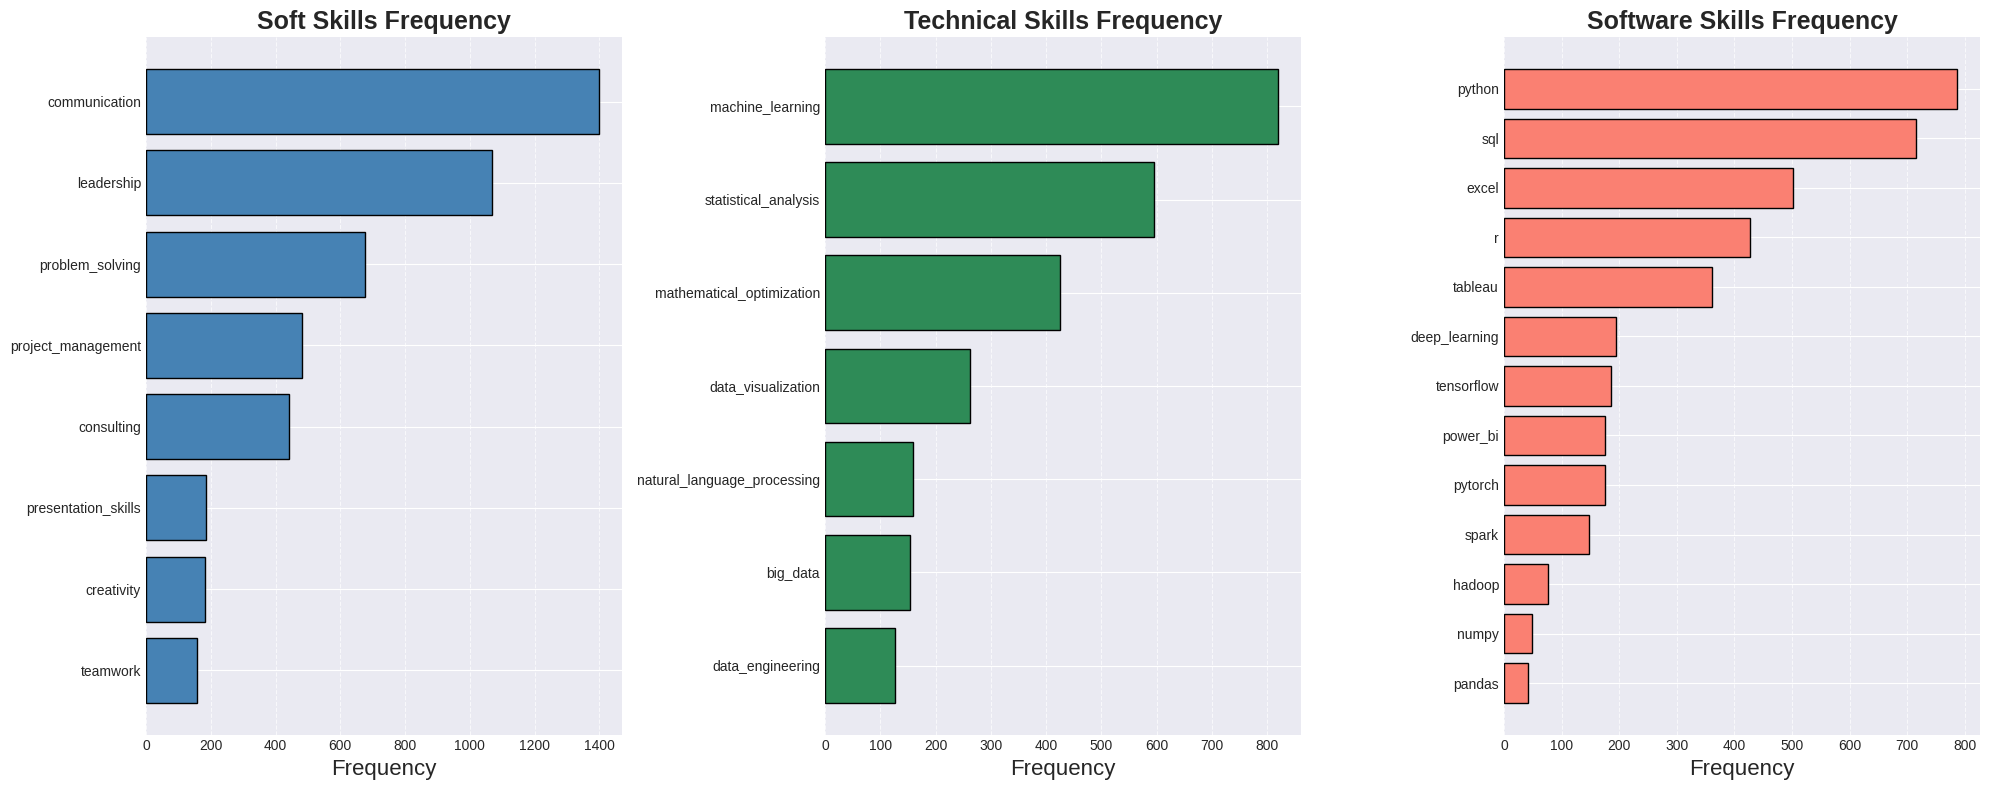

In [142]:
#Defining skills as per their type
soft_skills = [
    'leadership', 'problem_solving', 'creativity', 'teamwork', 'communication',
    'project_management', 'consulting', 'presentation_skills'
]

technical_skills = [
    'statistical_analysis', 'machine_learning', 'data_engineering', 'natural_language_processing',
     'mathematical_optimization', 'big_data', 'data_visualization'
]

software_skills = [
    'r', 'sql', 'python', 'excel', 'tensorflow', 'deep_learning', 'pandas',
    'tableau', 'power_bi', 'numpy', 'hadoop', 'spark', 'pytorch'
]

soft_sum_sorted = results[soft_skills].sum().sort_values(ascending=False)
technical_sum_sorted = results[technical_skills].sum().sort_values(ascending=False)
software_sum_sorted = results[software_skills].sum().sort_values(ascending=False)

#Plotting the distribution of each skill in each type of the skills
plt.style.use('seaborn-darkgrid')
colors = ['steelblue', 'seagreen', 'salmon']
fig, axs = plt.subplots(1, 3, figsize=(20, 8), dpi=100)

axs[0].barh(soft_sum_sorted.index, soft_sum_sorted.values, color=colors[0], edgecolor='black')
axs[0].set_title('Soft Skills Frequency', fontsize=18, fontweight='bold')
axs[0].set_xlabel('Frequency', fontsize=16)
axs[0].invert_yaxis()
axs[0].grid(axis='x', linestyle='--', alpha=0.7)

axs[1].barh(technical_sum_sorted.index, technical_sum_sorted.values, color=colors[1], edgecolor='black')
axs[1].set_title('Technical Skills Frequency', fontsize=18, fontweight='bold')
axs[1].set_xlabel('Frequency', fontsize=16)
axs[1].invert_yaxis()
axs[1].grid(axis='x', linestyle='--', alpha=0.7)

axs[2].barh(software_sum_sorted.index, software_sum_sorted.values, color=colors[2], edgecolor='black')
axs[2].set_title('Software Skills Frequency', fontsize=18, fontweight='bold')
axs[2].set_xlabel('Frequency', fontsize=16)
axs[2].invert_yaxis()
axs[2].grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

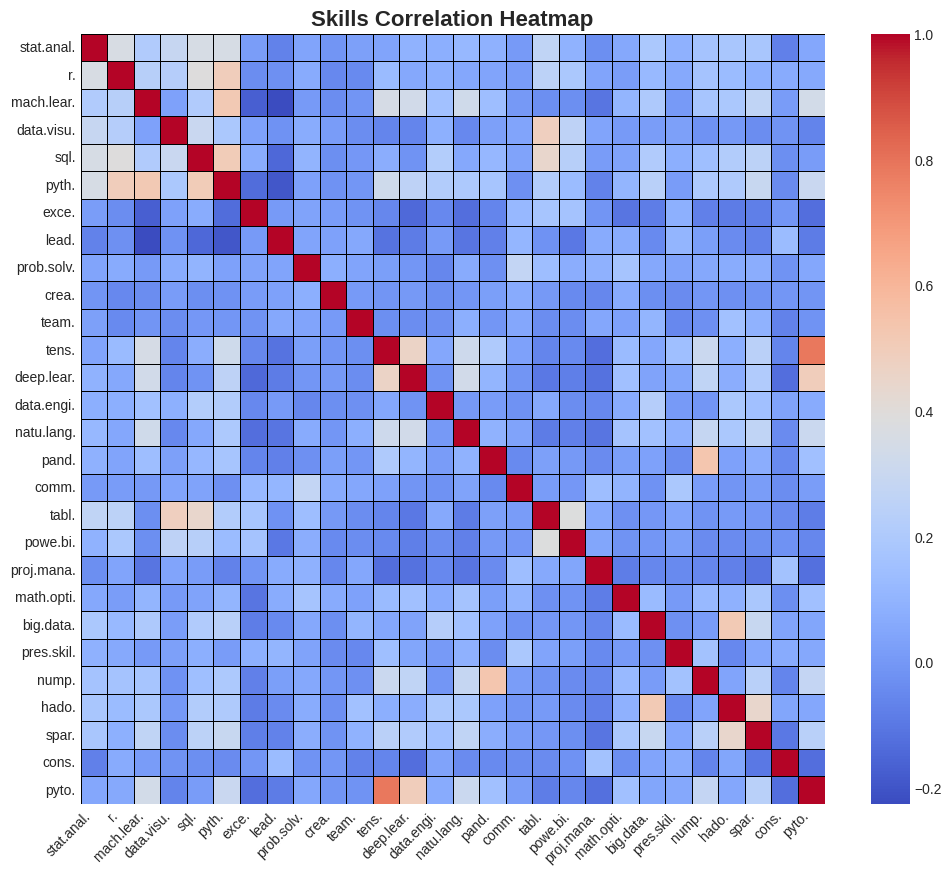

In [143]:
#Defining a function to shorten the names for better economy of space for graph
def shorten_skill_name(skill):
    parts = skill.split('_')
    if len(parts) > 1:
        return parts[0][:4] + '.' + parts[1][:4] + '.'
    else:
        return parts[0][:4] + '.'

#Plotting a correlation Heatmap, to understand mutual absence or mutual presence of jobs

skills_correlation = results.iloc[:, 7:].corr()
short_skill_names = [shorten_skill_name(skill) for skill in skills_correlation.columns]
plt.figure(figsize=(12, 10))

ax = sns.heatmap(skills_correlation, annot=False, cmap='coolwarm', linewidths=.5, linecolor='black')
ax.set_xticklabels(short_skill_names, rotation=45, ha='right')
ax.set_yticklabels(short_skill_names, rotation=0)
plt.title('Skills Correlation Heatmap', fontsize=16, weight='bold')

for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_color('black')

plt.show()


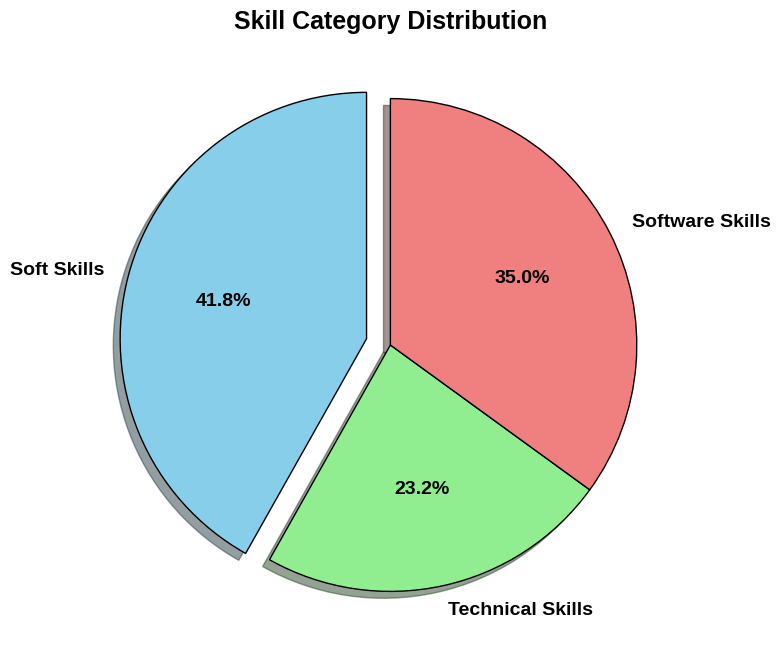

In [144]:
#Extracting sum of each type of skill using frequency of all individual skill within the type
category_counts = [
    results[soft_skills].sum().sum(),
    results[technical_skills].sum().sum(),
    results[software_skills].sum().sum()
]
categories = ['Soft Skills', 'Technical Skills', 'Software Skills']

#Plotting a Pie Chart to understand the total distribution
plt.figure(figsize=(10, 8), facecolor='white')
pie = plt.pie(category_counts, labels=categories, autopct='%1.1f%%', startangle=90,
              colors=['skyblue', 'lightgreen', 'lightcoral'], shadow=True, explode=(0.1, 0, 0),
              wedgeprops={'edgecolor': 'black'},
              textprops={'fontsize': 14, 'color': 'black', 'weight': 'bold'})

plt.title('Skill Category Distribution', fontsize=18, color='black', weight='bold')
plt.gca().set_facecolor('white')
plt.show()



<ipython-input-145-aafd5694ef33>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab20c = plt.cm.get_cmap('tab20c', 20)
<ipython-input-145-aafd5694ef33>:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab20b = plt.cm.get_cmap('tab20b', 10)


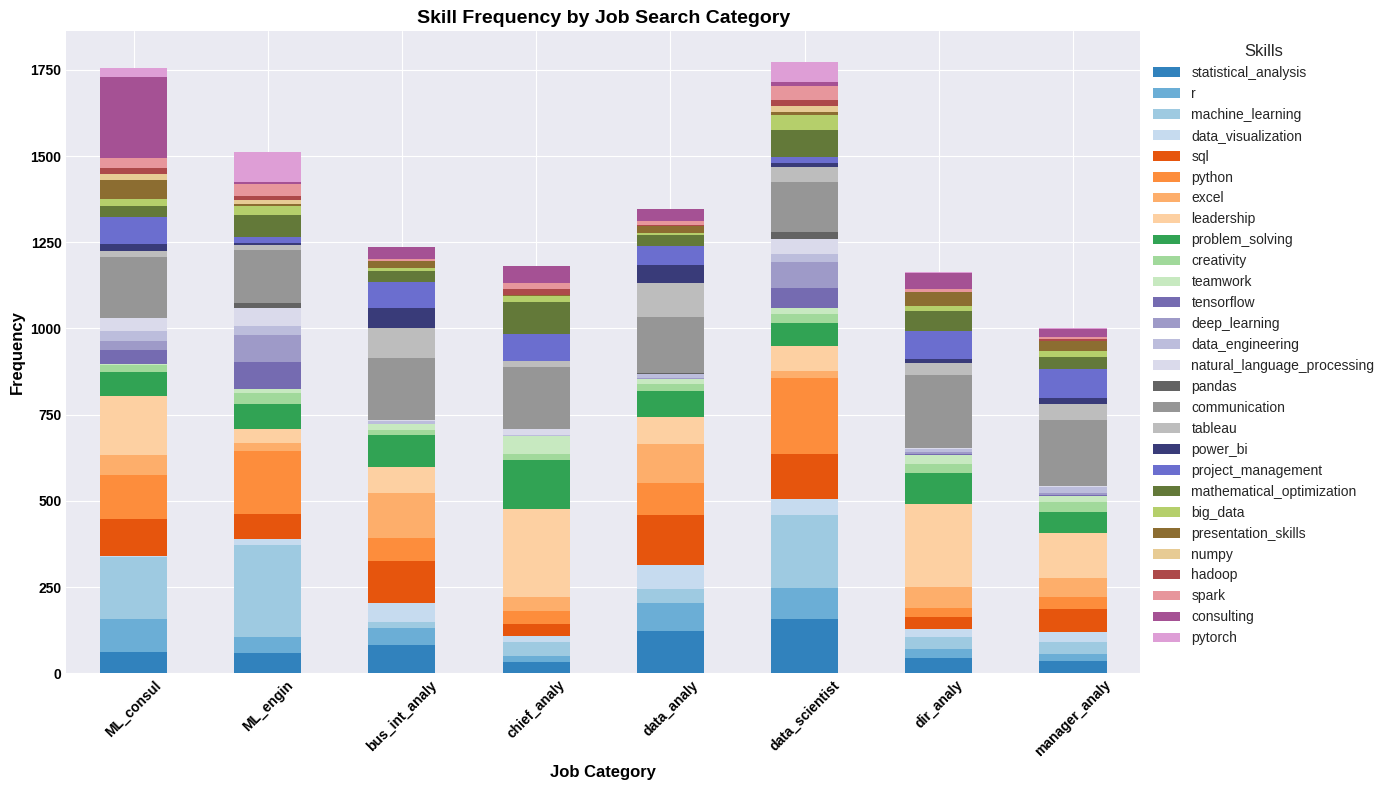

In [145]:
#Plotting the distribution of the skills in each job posting that for a specific type of job position that was searched for
job_categories = [
    'ML_consul',
    'ML_engin',
    'bus_int_analy',
    'chief_analy',
    'data_analy',
    'data_scientist',
    'dir_analy',
    'manager_analy'
]

skills_sum_df = pd.DataFrame()


for category in job_categories:
    matched_rows = results[results['Name of Job Search'] == category]
    skills_sum_df[category] = matched_rows.iloc[:, 7:].sum()

skills_sum_df_transposed = skills_sum_df.T

tab20c = plt.cm.get_cmap('tab20c', 20)
tab20b = plt.cm.get_cmap('tab20b', 10)
colors = mcolors.ListedColormap([tab20c(i) for i in range(20)] + [tab20b(i) for i in range(10)])

fig, ax = plt.subplots(figsize=(14, 8))
skills_sum_df_transposed.plot(kind='bar', stacked=True, ax=ax, colormap=colors)
ax.set_title('Skill Frequency by Job Search Category', fontsize=14, weight='bold', color='black')
ax.set_xlabel('Job Category', fontsize=12, weight='bold', color='black')
ax.set_ylabel('Frequency', fontsize=12, weight='bold', color='black')

plt.xticks(rotation=45, fontsize=10, weight='bold', color='black')
plt.yticks(fontsize=10, weight='bold', color='black')

plt.legend(title='Skills', bbox_to_anchor=(1.0, 1.0), loc='upper left', fontsize=10, title_fontsize=12)


plt.tight_layout()
plt.show()



# Performing Hierarchical Clustering

In [146]:
#Extracting our encoded columns of the skills and storing in a numpy array
df = results.iloc[:,7:]
df_summary = df.apply(pd.to_numeric)
a = df_summary.values

print("Number of job postings:", a.shape[0])
print(a)
a.shape

Number of job postings: 2390
[[0. 0. 1. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(2390, 28)

In [147]:
#Performing our Distance Matrix Calculation for use in our hierarchical clustering
D = np.zeros([a.shape[1], a.shape[1]])

for k in range(a.shape[0]):
    for i in range(a.shape[1]):
        for j in range(a.shape[1]):
            D[i, j] += np.abs((a[k, i] - a[k, j]))


In [148]:
#using scipy's hierarchical clustering library to get the linkage matrix and using the average method after experimentation
Y = sch.linkage(D, method='average')

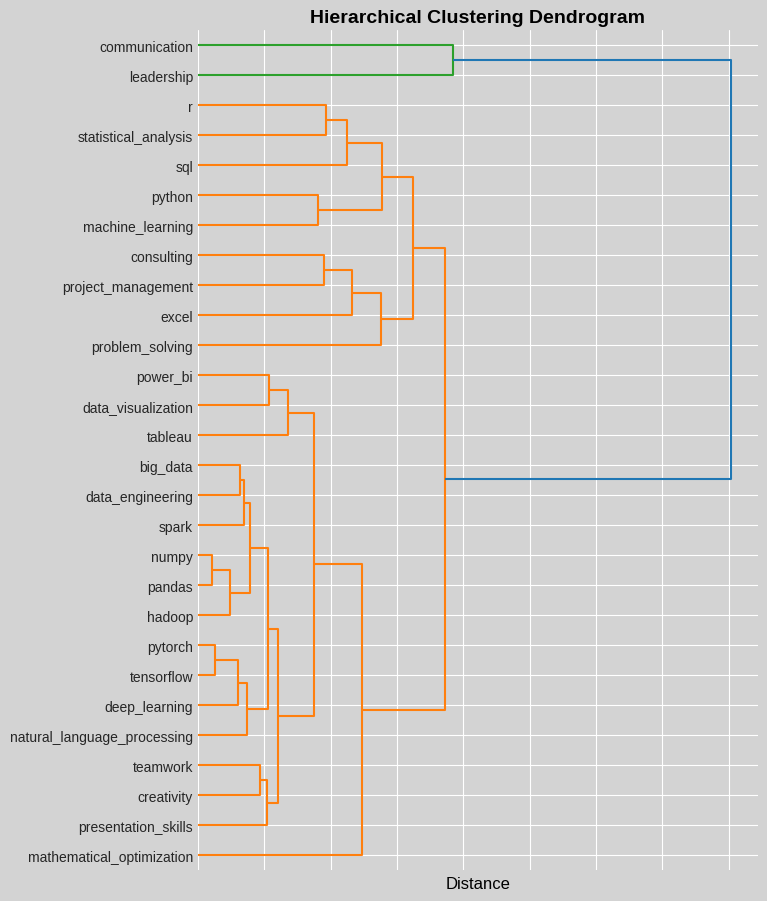

In [149]:
#Plotting the Dendogram using our linkage matrix
fig = plt.figure(figsize=(14,14), facecolor='lightgrey')
ax = fig.add_axes([0.1, 0.1, 0.4, 0.6], facecolor='lightgrey')

Z = sch.dendrogram(Y, orientation='right')
labels = df_summary.columns[Z['leaves']]

ax.set_yticklabels(labels, fontsize=10)
plt.title('Hierarchical Clustering Dendrogram', fontsize=14, weight='bold', color='black')
ax.set_xlabel('Distance', fontsize=12, color='black')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.show()

### Print clusters for selected distance level

In [150]:
# Cutting the dendrogram at max_d. max_d selected using observation and trial and error
max_d = 375

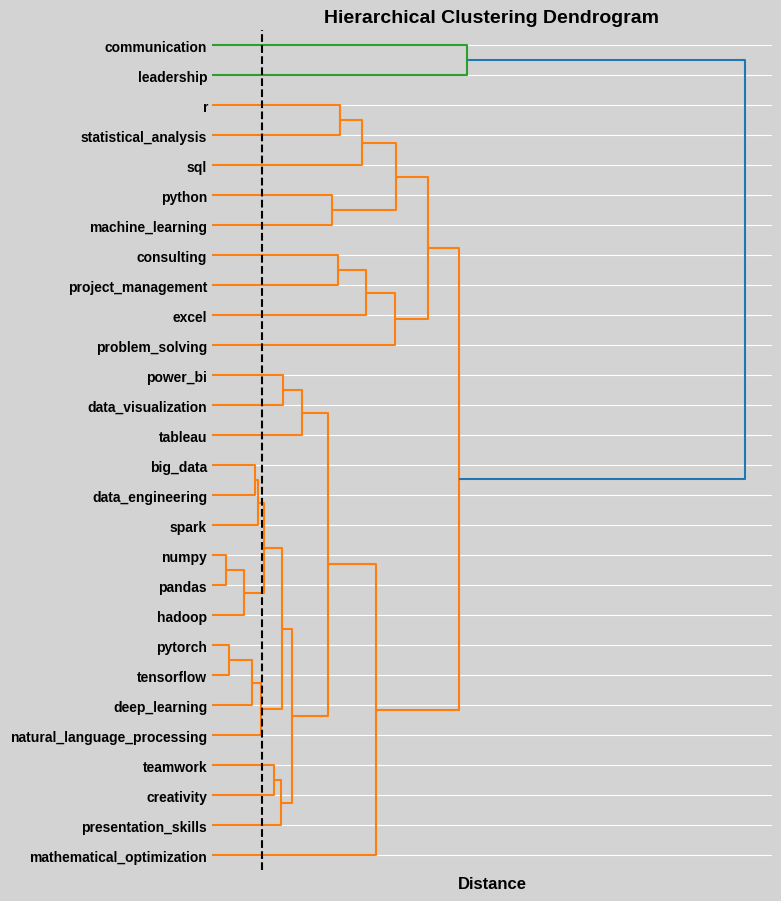

In [151]:
#plotting the dendogram with max_d line
fig = plt.figure(figsize=(14, 14), facecolor='lightgrey')
ax = fig.add_axes([0.1, 0.1, 0.4, 0.6], facecolor='lightgrey')

Z = sch.dendrogram(Y, orientation='right')
labels = df_summary.columns[Z['leaves']]
ax.set_xticks([])
ax.set_yticklabels(labels, fontsize=10, weight='bold', color='black')

plt.axvline(x=max_d, c='k', linestyle='--')

plt.title('Hierarchical Clustering Dendrogram', fontsize=14, weight='bold', color='black')
ax.set_xlabel('Distance', fontsize=12, weight='bold', color='black')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.show()

In [152]:
## Identify clusters with max_d cut

lbs = sch.fcluster(Y, max_d, 'distance')
clustr = lbs[Z['leaves']]

clust_skls = {}
for k in list(set(clustr)):
    clust_skls[k] = []

for j in range(len(labels)):
    clust_skls[clustr[j]].append(labels[j])

In [153]:
#The clusters as defined by the dendogram and max_d
for key, value in clust_skls.items():
    print(key, value)

1 ['creativity']
2 ['teamwork']
3 ['presentation_skills']
4 ['natural_language_processing', 'deep_learning', 'tensorflow', 'pytorch']
5 ['hadoop', 'pandas', 'numpy']
6 ['spark', 'data_engineering', 'big_data']
7 ['data_visualization']
8 ['power_bi']
9 ['tableau']
10 ['mathematical_optimization']
11 ['project_management']
12 ['consulting']
13 ['excel']
14 ['problem_solving']
15 ['machine_learning']
16 ['python']
17 ['statistical_analysis']
18 ['r']
19 ['sql']
20 ['leadership']
21 ['communication']


In [154]:
#The number of automatically created clusters
print("Number of automatically created clusters:",len(clust_skls))

Number of automatically created clusters: 21


In [155]:
#manual adjustment of clusters based on 3 courses requirement and logical domain understanding - except 1 course (Justified in Report)
clust_skills_kmeans = {}
clust_skills = {}
clust_skills[0] = ['Python', 'Numpy', 'Pandas']
clust_skills[1] = ['Machine Learning', 'Mathematical Optimization']
clust_skills[2] = ['R','Statistical Analysis','SQL']
clust_skills[3] = ['Power BI', 'Data Visualization', 'Tableau']
clust_skills[4] = ['Big Data','Spark','Data Engineering','Hadoop']
clust_skills[5] = ['Pytorch','TensorFlow','Deep Learning','Natural Language Processing']
clust_skills[6] = ['Teamwork', 'Creativity', 'Presentation Skills']
clust_skills[7] = ['Consulting', 'Project Management', 'Excel']
clust_skills[8] = ['Communication', 'Leadership','Problem Solving']



# Chat GPT prompts for Hierarchical Clustering

In [156]:
#Preparing course list for input in chatGPT API to extract insights using two prompts
'''
input_skills = ''
for i in clust_skills.keys():
    input_skills += 'Course ' + str(i+1) + ': ' + ', '.join(clust_skills[i]) + '; '
input_skills = input_skills[:-2]
'''

"\ninput_skills = ''\nfor i in clust_skills.keys():\n    input_skills += 'Course ' + str(i+1) + ': ' + ', '.join(clust_skills[i]) + '; '\ninput_skills = input_skills[:-2]\n"

In [157]:
#Chat GPT Model execution for First Prompt Insights
'''data = {
    "model": "gpt-3.5-turbo",  # Confirming the use of a chat model
    "messages": [
        {"role": "user", "content": f"Based on the following courses, give me a short description of my course curriculum that entices potential students to enroll in this program. Limit the output to  70 words:{input_skills}"}
    ],
    "temperature": 0.7,
    "max_tokens": 500,
    "top_p": 1.0,
    "frequency_penalty": 0.8,
    "presence_penalty": 0.0
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=data)

if response.status_code == 200:
    print(response.json()["choices"][0]["message"]["content"])
else:
    print("Error:", response.status_code, response.text)'''

'data = {\n    "model": "gpt-3.5-turbo",  # Confirming the use of a chat model\n    "messages": [\n        {"role": "user", "content": f"Based on the following courses, give me a short description of my course curriculum that entices potential students to enroll in this program. Limit the output to  70 words:{input_skills}"}\n    ],\n    "temperature": 0.7,\n    "max_tokens": 500,\n    "top_p": 1.0,\n    "frequency_penalty": 0.8,\n    "presence_penalty": 0.0\n}\n\nresponse = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=data)\n\nif response.status_code == 200:\n    print(response.json()["choices"][0]["message"]["content"])\nelse:\n    print("Error:", response.status_code, response.text)'

In [158]:
#Chat GPT Model execution for Second Prompt Insights
'''data = {
    "model": "gpt-4",  # Confirming the use of a chat model
    "messages": [
        {"role": "user", "content": f"Help me understand how each of these clustered courses complement each other that it makes it into an effective course curriculum. Give me 6 bullet points with each no longer than 20 words :{input_skills}"}
    ],
    "temperature": 0.7,
    "max_tokens": 400,
    "top_p": 1.0,
    "frequency_penalty": 0.0,
    "presence_penalty": 0.0
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=data)

if response.status_code == 200:
    print(response.json()["choices"][0]["message"]["content"])
else:
    print("Error:", response.status_code, response.text)'''

'data = {\n    "model": "gpt-4",  # Confirming the use of a chat model\n    "messages": [\n        {"role": "user", "content": f"Help me understand how each of these clustered courses complement each other that it makes it into an effective course curriculum. Give me 6 bullet points with each no longer than 20 words :{input_skills}"}\n    ],\n    "temperature": 0.7,\n    "max_tokens": 400,\n    "top_p": 1.0,\n    "frequency_penalty": 0.0,\n    "presence_penalty": 0.0\n}\n\nresponse = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=data)\n\nif response.status_code == 200:\n    print(response.json()["choices"][0]["message"]["content"])\nelse:\n    print("Error:", response.status_code, response.text)'

# Feature Engineering

In [159]:
#Feature 1: Frequency of each skill appearing all job postings
results_num = results.iloc[:,7:]

#New Dataframe iniitialized which will store our engineered features
results_feat = pd.DataFrame(index=results_num.columns)
results_feat['frequency'] = None
column_sums = results_num.sum()
results_feat['frequency'] = column_sums.values
print(results_feat)

                             frequency
statistical_analysis             595.0
r                                428.0
machine_learning                 820.0
data_visualization               262.0
sql                              716.0
python                           787.0
excel                            502.0
leadership                      1067.0
problem_solving                  675.0
creativity                       182.0
teamwork                         156.0
tensorflow                       186.0
deep_learning                    194.0
data_engineering                 127.0
natural_language_processing      159.0
pandas                            41.0
communication                   1400.0
tableau                          362.0
power_bi                         175.0
project_management               481.0
mathematical_optimization        425.0
big_data                         153.0
presentation_skills              185.0
numpy                             48.0
hadoop                   

In [160]:
#Feature 2: Soft Skill, Technical Skill or Software skill  defined and then one hot encoded
soft_skills = [
    'leadership', 'problem_solving', 'creativity', 'teamwork', 'communication',
    'project_management', 'consulting', 'presentation_skills'
]

technical_skills = [
    'statistical_analysis', 'machine_learning', 'data_engineering', 'natural_language_processing',
     'mathematical_optimization', 'big_data', 'data_visualization', 'deep_learning'
]

software_skills = [
    'r', 'sql', 'python', 'excel', 'tensorflow', 'pandas',
    'tableau', 'power_bi', 'numpy', 'hadoop', 'spark', 'pytorch'
]

results_feat['Soft Skills'] = None
results_feat['Technical Skills'] = None
results_feat['Software Skills'] = None

for index in results_feat.index:
  if index in soft_skills:
    results_feat.at[index, 'Soft Skills'] = 1
  else:
    results_feat.at[index, 'Soft Skills'] = 0

  if index in technical_skills:
    results_feat.at[index, 'Technical Skills'] = 1
  else:
    results_feat.at[index, 'Technical Skills'] = 0

  if index in software_skills:
    results_feat.at[index, 'Software Skills'] = 1
  else:
    results_feat.at[index, 'Software Skills'] = 0

results_feat


,frequency,Soft Skills,Technical Skills,Software Skills
statistical_analysis,595.0,0,1,0
r,428.0,0,0,1
machine_learning,820.0,0,1,0
data_visualization,262.0,0,1,0
sql,716.0,0,0,1
python,787.0,0,0,1
excel,502.0,0,0,1
leadership,1067.0,1,0,0
problem_solving,675.0,1,0,0
creativity,182.0,1,0,0


In [161]:
#Feature 3: Skill Transferability across wide variety of careers - Ordinally encoded

low_tran = ['tensorflow','deep_learning','data_engineering','natural_language_processing','big_data','hadoop','spark','pytorch']
moderate_tran = ['consulting','statistical_analysis', 'python','numpy','pandas','r','machine_learning','scikit_learn','sql','mathematical_optimization']
high_tran  = ['excel','leadership','problem_solving','creativity','teamwork','communication', 'project_management','presentation_skills','tableau', 'power_bi','data_visualization']

results_feat['skill_transfer_ability'] = None
for index in results_feat.index:
  if index in low_tran:
    results_feat.at[index, 'skill_transfer_ability'] = 1
  elif index in moderate_tran:
    results_feat.at[index, 'skill_transfer_ability'] = 2
  elif index in high_tran:
    results_feat.at[index, 'skill_transfer_ability'] = 3
  else:
    print('Not in any list')

results_feat


,frequency,Soft Skills,Technical Skills,Software Skills,skill_transfer_ability
statistical_analysis,595.0,0,1,0,2
r,428.0,0,0,1,2
machine_learning,820.0,0,1,0,2
data_visualization,262.0,0,1,0,3
sql,716.0,0,0,1,2
python,787.0,0,0,1,2
excel,502.0,0,0,1,3
leadership,1067.0,1,0,0,3
problem_solving,675.0,1,0,0,3
creativity,182.0,1,0,0,3


In [162]:
#Feature 4: How often does each skill appear on average in the job description if it is present in a job description

#Defining function to count how often a skill appears if it exists with alternate forms (everygrams used)
def count_skill_occurrences(tokens, skills):
    all_grams = list(everygrams(tokens, 1, max(len(skill.split()) for skill in skills)))
    all_grams_as_strings = [' '.join(gram) for gram in all_grams]

    alternative_forms = {
        'problem_solving': ['problem solving', 'problem-solving'],
        'tensorflow': ['tensorflow', 'tensor flow'],
        'deep_learning': ['deep learning', 'deeplearning'],
        'natural_language_processing': ['natural language processing', 'nlp'],
        'scikit_learn': ['sci-kit learn', 'scikit', 'sci-kit', 'scikit learn'],
        'mathematical_optimization' : ['mathematical optimization', 'optimization'],
        'statistical_analysis' : ['statistical analysis', 'statistics'],

    }

    skill_counts = {skill.replace(' ', '_').lower(): 0 for skill in skills}

    for skill in skills:
        normalized_skill = skill.replace(' ', '_').lower()
        search_terms = [skill.lower()]

        if normalized_skill in alternative_forms:
            search_terms.extend(alternative_forms[normalized_skill])

        skill_count = 0
        for term in search_terms:
            skill_count += all_grams_as_strings.count(term)
        skill_counts[normalized_skill] = skill_count

    return skill_counts

skill_aggregate_counts = {skill.replace(' ', '_').lower(): {'total_count': 0, 'occurrence_count': 0} for skill in skills}

#applying the function for each job description and then inputting this as a column in our new dataframe
for index, row in results.iterrows():
    skills_counted = count_skill_occurrences(row['cleaned_tokenized_data'], skills)
    for skill, count in skills_counted.items():
        if count > 0:
            skill_aggregate_counts[skill]['total_count'] += count
            skill_aggregate_counts[skill]['occurrence_count'] += 1

avg_freq_per_job = {skill: (info['total_count'] / info['occurrence_count'] if info['occurrence_count'] > 0 else 0)
                    for skill, info in skill_aggregate_counts.items()}

results_feat['avg_mention_if_skill_appears'] = results_feat.index.map(avg_freq_per_job)

In [163]:
#Feature 5 - Most common job type for each of the skills

#Defining a list of alternative wordings for each type of job
job_type_alternatives = {
    'in-person': ['in-person', 'in person', 'on-site', 'on site','at site', 'at-site','at plant'],
    'remote': ['remote', 'work from home', 'virtual'],
    'hybrid': ['hybrid', 'mixed', 'flexible location'],
}

job_type_lookup = {}
for main_form, alternatives in job_type_alternatives.items():
    for alternative in alternatives:
        job_type_lookup[alternative] = main_form

#Defining a function that identifies exstence of job type in a description. everygrams used.
def identify_job_type(tokens):

    all_grams = list(everygrams(tokens, 1, max(len(term.split()) for term in job_type_lookup)))
    all_grams_as_strings = [' '.join(gram) for gram in all_grams]
    job_type_counts = {main_form: 0 for main_form in job_type_alternatives}

    for gram in all_grams_as_strings:
        if gram in job_type_lookup:
            job_type_counts[job_type_lookup[gram]] += 1

    #output the most frequent job type observed as it is only feasible for the job to be one of them
    most_common_job_type = max(job_type_counts, key=job_type_counts.get)
    return most_common_job_type if job_type_counts[most_common_job_type] > 0 else 'unknown'

most_common_job_types = {}


#Applying the function to each job description, getting the most common for each skill and inputted in a column in results_feat
for skill in results.columns[7:]:
    skill_job_types = []
    for _, row in results[results[skill] == 1].iterrows():
        job_type = identify_job_type(row['cleaned_tokenized_data'])
        if job_type != 'unknown':
            skill_job_types.append(job_type)

    if skill_job_types:
        most_common_job_type = max(set(skill_job_types), key=skill_job_types.count)
    else:
        most_common_job_type = 'unknown'

    most_common_job_types[skill] = most_common_job_type

for skill, job_type in most_common_job_types.items():
    if skill in results_feat.index:
        results_feat.loc[skill, 'most_common_job_type_skill'] = job_type
    else:
        print(f"Skill '{skill}' not found in 'results_feat' index.")


#one hot encoding due to nominal nature of categorical variable
dummies = pd.get_dummies(results_feat['most_common_job_type_skill'])
dummies.rename(columns={'remote': 'remote_most_common', 'in-person': 'in_person_most_common', 'hybrid': 'hybrid_most_common'}, inplace=True)
results_feat = pd.concat([results_feat, dummies], axis=1)
results_feat.drop('most_common_job_type_skill', axis=1, inplace=True)


In [164]:
#Feature 6: proportion of mentioned education level for each skill

# Define alternate forms for the three main education levels
education_level_alternatives = {
    'bachelor': ['bachelor', 'bachelor\'s', 'bachelors', 'undergraduate'],
    'master': ['master', 'master\'s', 'masters', 'graduate', 'msc', 'meng', 'postgraduate', 'post graduate'],
    'phd': ['phd', 'ph.d', 'doctorate', 'doctoral']
}

education_level_lookup = {}
for main_form, alternatives in education_level_alternatives.items():
    for alternative in alternatives:
        education_level_lookup[alternative] = main_form

#Function that identifies if a certain education level is mentioned within the job descriptption
def count_education_levels_once_per_job(tokens, education_level_lookup):
    all_grams = list(everygrams(tokens, 1, max(len(term.split()) for term in education_level_lookup)))
    all_grams_as_strings = [' '.join(gram) for gram in all_grams]
    education_present = {level: 0 for level in education_level_alternatives.keys()}

    for gram in all_grams_as_strings:
        if gram in education_level_lookup:
            education_present[education_level_lookup[gram]] = 1

    return education_present

education_counts_df = pd.DataFrame(index=results.columns[7:], columns=['bachelor_count', 'master_count', 'phd_count']).fillna(0)

#Applying this function for all job descriptions
for skill in results.columns[7:]:
    total_counts = {'bachelor': 0, 'master': 0, 'phd': 0}

    for _, row in results[results[skill] == 1].iterrows():
        presence_flags = count_education_levels_once_per_job(row['cleaned_tokenized_data'], education_level_lookup)
        for level in total_counts.keys():
            total_counts[level] += presence_flags[level]

    education_counts_df.loc[skill, 'bachelor_count'] = total_counts['bachelor']
    education_counts_df.loc[skill, 'master_count'] = total_counts['master']
    education_counts_df.loc[skill, 'phd_count'] = total_counts['phd']

for column in education_counts_df.columns:
    if column in results_feat.columns:
        results_feat[column] += education_counts_df[column]
    else:
        results_feat[column] = education_counts_df[column]


results_feat[['bachelor_count', 'master_count', 'phd_count']] = results_feat[['bachelor_count', 'master_count', 'phd_count']].fillna(0).astype(int)

#Calculating the proportions for each education type for the same skill and adding in results_feat

results_feat['bachelor_ratio'] = results_feat['bachelor_count'] / (results_feat['bachelor_count'] + results_feat['master_count'] + results_feat['phd_count'])
results_feat['master_ratio'] = results_feat['master_count'] / (results_feat['bachelor_count'] + results_feat['master_count'] + results_feat['phd_count'])
results_feat['phd_ratio'] = results_feat['phd_count'] / (results_feat['bachelor_count'] + results_feat['master_count'] + results_feat['phd_count'])
results_feat.drop(['bachelor_count', 'master_count', 'phd_count'], axis=1, inplace=True)

In [165]:
#Feature 7: Average number of years of experience mentioned with each skills

# Defining a comprehensive set of patterns to capture various ways of expressing experience requirements
experience_patterns = [
    r'(\d+)(?:-?(\d+))? years? of experience',
    r'(\d+) to (\d+) years? experience',
    r'at least (\d+) years?',
    r'minimum of (\d+) years?',
    r'(\d+) years? experience required',
    r'(\d+) years? professional experience',
    r'(\d+) years? relevant experience',
    r'(\d+) years? prior experience',
    r'(\d+) years? (\w+ )?experience',
    r'experience: (\d+) years?',
    r'(\d+) years? in a (\w+ )?role',
    r'(\d+) years? of (\w+ )?work experience',
    r'(\d+) years? (\w+ )?in the field',
    r'(\d+) years? (\w+ )?industry experience',
    r'(\d+)(?:-?(\d+))? years? (\w+ )?post-graduation',
    r'(\d+) or more years?',
]

combined_pattern = '|'.join(f'(?P<p{idx}>{pattern})' for idx, pattern in enumerate(experience_patterns))
regex = re.compile(combined_pattern, re.IGNORECASE)

#Defining a function that identifies presence of experince mentioned, if multiple times experience years mentioned, average taken
def extract_experience(text):
    experiences = []
    for match in regex.finditer(text):
        nums = [int(num) for num in match.groups() if num and num.isdigit()]
        if len(nums) == 2:
            experiences.append(sum(nums) / 2)
        elif nums:
            experiences.append(nums[0])

    return np.mean(experiences) if experiences else None

average_experience = {}

#Applying the function to every single job description to extract experience, averaging the results for each skill and adding to results_Feat DF
for skill in results.columns[7:]:
    experiences = []
    for _, row in results.iterrows():
        if row[skill] == 1:
            experience = extract_experience(' '.join(row['cleaned_tokenized_data']))
            if experience is not None:
                experiences.append(experience)

    average_experience[skill] = np.mean(experiences) if experiences else np.nan

average_experience_df = pd.DataFrame(list(average_experience.items()), columns=['Skill', 'Average_Experience_Years'])

results_feat = results_feat.reset_index().merge(average_experience_df, how='left', left_on='index', right_on='Skill')
results_feat = results_feat.set_index('index').drop(columns=['Skill'])



In [166]:
#Feature 8: Most frequent job position as per search for each skill and adding to results_feat
results_feat['most_freq_job_pos'] = ''

for skill in results.columns[7:]:
    skill_rows = results[results[skill] == 1]

    if not skill_rows.empty:
        most_common_job = skill_rows['Name of Job Search'].mode()[0]
    else:
        most_common_job = 'None'

    results_feat.loc[skill, 'most_freq_job_pos'] = most_common_job

#One hot encoding due to ordinal nature of the data
dummies = pd.get_dummies(results_feat['most_freq_job_pos']).rename(columns=lambda x: x + '_most_frequent')
results_feat = pd.concat([results_feat, dummies], axis=1)
results_feat.drop(columns = 'most_freq_job_pos', inplace = True)

In [167]:
#Feature 9: Propoortion of requirement of certificate associated with each skill (Amount of times it is mentioned divided by tthe total of job postings that have that skill)

#Alternate forms defined for what could be referred to as certificate
certificate_alternatives = ['certificate', 'certification', 'certified', 'cert', 'accreditation','accredited']

# Defining a function to check for certificate mentions and ensure each mention is counted once per job posting - everygrams leveraged
def identify_certificate_mentions(tokens):
    all_grams_as_strings = [' '.join(gram).lower() for gram in everygrams(tokens, 1, max(len(word.split()) for word in certificate_alternatives))]
    mentioned = any(alt in all_grams_as_strings for alt in certificate_alternatives)
    return mentioned

certificate_counts = {}

#applying this function to each job description to extract if certicate is mentioned, count is stored for each skill
for skill in results.columns[7:]:
    certificate_mentions = 0
    for _, row in results[results[skill] == 1].iterrows():
        tokens = row['cleaned_tokenized_data']
        if identify_certificate_mentions(tokens):
            certificate_mentions += 1

    certificate_counts[skill] = certificate_mentions

for skill, count in certificate_counts.items():
    results_feat.loc[skill, 'certificate_count'] = count


#Getting total postings where each skill is mentioned for use in proportion
total_skill_postings = {skill: results[skill].sum() for skill in results.columns[7:]}
print(total_skill_postings)

# Calculating proportions of postings mentioning certificates for each skill
certificate_proportions = {skill: (certificate_counts[skill] / total_skill_postings[skill]) if total_skill_postings[skill] > 0 else 0 for skill in certificate_counts}

# Updating 'results_feat DataFrame with the certificate mention proportions
for skill, proportion in certificate_proportions.items():
    results_feat.loc[skill, 'certificate_proportion'] = proportion

results_feat.drop(columns = 'certificate_count', inplace = True)

{'statistical_analysis': 595.0, 'r': 428.0, 'machine_learning': 820.0, 'data_visualization': 262.0, 'sql': 716.0, 'python': 787.0, 'excel': 502.0, 'leadership': 1067.0, 'problem_solving': 675.0, 'creativity': 182.0, 'teamwork': 156.0, 'tensorflow': 186.0, 'deep_learning': 194.0, 'data_engineering': 127.0, 'natural_language_processing': 159.0, 'pandas': 41.0, 'communication': 1400.0, 'tableau': 362.0, 'power_bi': 175.0, 'project_management': 481.0, 'mathematical_optimization': 425.0, 'big_data': 153.0, 'presentation_skills': 185.0, 'numpy': 48.0, 'hadoop': 77.0, 'spark': 148.0, 'consulting': 443.0, 'pytorch': 175.0}


In [168]:
#Feature 10 - which skill has what proportion of each level of jobs associated with it

#Defining alternative forms
job_level_alternatives = {
    'entry_level': ['entry level', 'entry-level', 'junior', 'graduate', 'entry', 'beginner', 'intern', 'internship', 'no experience', 'new grad', 'recent grad', 'trainee', 'apprentice'],
    'mid_level': ['mid level', 'mid-level', 'intermediate', 'associate', 'professional', 'experienced', 'team lead', 'senior associate', 'moderate experience'],
    'senior': ['senior', 'lead', 'principal', 'executive', 'chief', 'head', 'director', 'management', 'manager', 'expert', 'specialist']
}

results_feat['entry_level_count'] = 0
results_feat['mid_level_count'] = 0
results_feat['senior_level_count'] = 0

job_level_lookup = {}
for main_form, alternatives in job_level_alternatives.items():
    for alternative in alternatives:
        job_level_lookup[alternative] = main_form

# Defining a  Function to count job levels mentioned in a job description
def count_job_levels(tokens):
    mentioned_levels = {'entry_level': 0, 'mid_level': 0, 'senior': 0}
    for token in tokens:
        token = token.lower()
        if token in job_level_lookup:
            mentioned_levels[job_level_lookup[token]] = 1
    return mentioned_levels

# Applying this function to each job description present, getting the proportions as per the total counts of each job level totalled, and then adding columns in results_feat
for skill in results.columns[7:]:
    for _, row in results.iterrows():
        if row[skill] == 1:
            tokens = row['cleaned_tokenized_data']
            levels_count = count_job_levels(tokens)
            results_feat.at[skill, 'entry_level_count'] += levels_count['entry_level']
            results_feat.at[skill, 'mid_level_count'] += levels_count['mid_level']
            results_feat.at[skill, 'senior_level_count'] += levels_count['senior']

results_feat['total_counts'] = results_feat['entry_level_count'] + results_feat['mid_level_count'] + results_feat['senior_level_count']
results_feat['total_counts'].replace(0, 1, inplace=True)

results_feat['entry_level_proportion'] = results_feat['entry_level_count'] / results_feat['total_counts']
results_feat['mid_level_proportion'] = results_feat['mid_level_count'] / results_feat['total_counts']
results_feat['senior_level_proportion'] = results_feat['senior_level_count'] / results_feat['total_counts']


results_feat.drop('total_counts', axis=1, inplace=True)
results_feat.drop('entry_level_count', axis = 1, inplace = True)
results_feat.drop('mid_level_count', axis = 1, inplace = True)
results_feat.drop('senior_level_count', axis = 1,inplace = True)

# Peforming K-Means Clustering

In [169]:
#Standardizing continuous and ordinal scales to ensure unskewed distance calculations for K-Means
results_feat.columns.tolist()
ordinal_and_continuous_cols = ['frequency','skill_transfer_ability', 'avg_mention_if_skill_appears', 'bachelor_ratio', 'master_ratio', 'phd_ratio', 'Average_Experience_Years','certificate_proportion','entry_level_proportion', 'mid_level_proportion','senior_level_proportion']
scaler = StandardScaler()
results_feat[ordinal_and_continuous_cols] = scaler.fit_transform(results_feat[ordinal_and_continuous_cols])


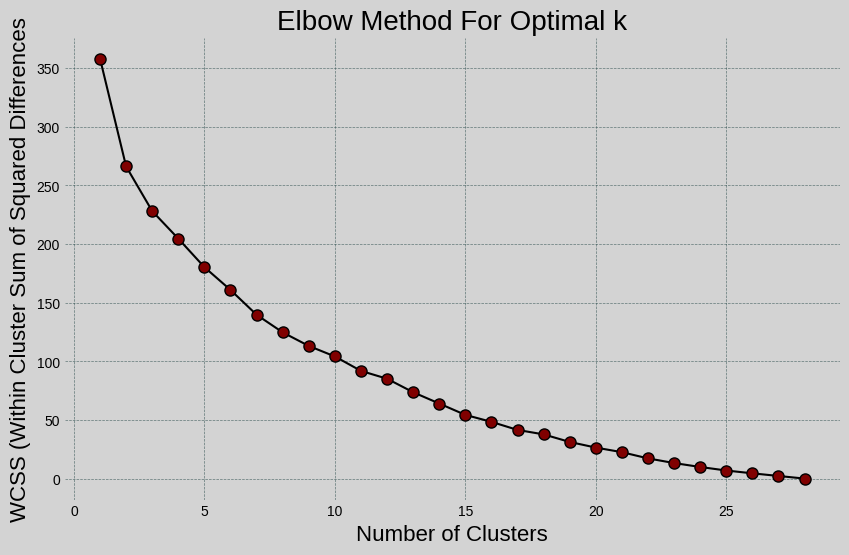

In [170]:
#Performing K-Means for range of k and then using elbow plot to understand optimal number of clusters
k_range = range(1, 29)

sum_of_squared_distances = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init = 10, random_state=42)
    kmeans.fit(results_feat)
    sum_of_squared_distances.append(kmeans.inertia_)

#Plotting the elbow plot
light_grey = '#D3D3D3'
dark_grey = '#2F4F4F'

fig, ax = plt.subplots(figsize=(10, 6), facecolor=light_grey)
ax.set_facecolor(light_grey)
ax.plot(k_range, sum_of_squared_distances, marker='o', markersize=8, linestyle='-', color='black', markeredgecolor='black', markerfacecolor='maroon')

ax.set_title('Elbow Method For Optimal k', fontsize=20, color='black')
ax.set_xlabel('Number of Clusters', fontsize=16, color='black')
ax.set_ylabel('WCSS (Within Cluster Sum of Squared Differences', fontsize=16, color='black')

ax.grid(True, color=dark_grey, linestyle='--', linewidth=0.5, alpha=0.7)

for spine in ax.spines.values():
    spine.set_edgecolor('black')

ax.tick_params(colors='black', which='both')

plt.show()


In [171]:
#Performing K-Means with identified optimal k value, and then extracting these clusters for interpretation
k_optimal = 10
kmeans_optimal = KMeans(n_clusters=k_optimal, n_init = 10, random_state=42)
clusters = kmeans_optimal.fit_predict(results_feat)

clustered_skills = [[] for _ in range(k_optimal)]
for index, label in enumerate(clusters):
    clustered_skills[label].append(results_feat.index[index])

clustered_skills



[['leadership', 'problem_solving', 'communication'],
 ['r', 'python', 'data_engineering', 'mathematical_optimization'],
 ['excel', 'project_management', 'presentation_skills', 'consulting'],
 ['data_visualization', 'sql', 'creativity', 'tableau', 'power_bi'],
 ['spark', 'pytorch'],
 ['numpy'],
 ['teamwork'],
 ['tensorflow', 'deep_learning', 'natural_language_processing'],
 ['statistical_analysis', 'machine_learning'],
 ['pandas', 'big_data', 'hadoop']]

In [172]:
#Conducting PCA for our K-Means Clustering to get a scatter plot that can help us visualize these clusters
pca = PCA(n_components=2)
principal_components = pca.fit_transform(results_feat)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters


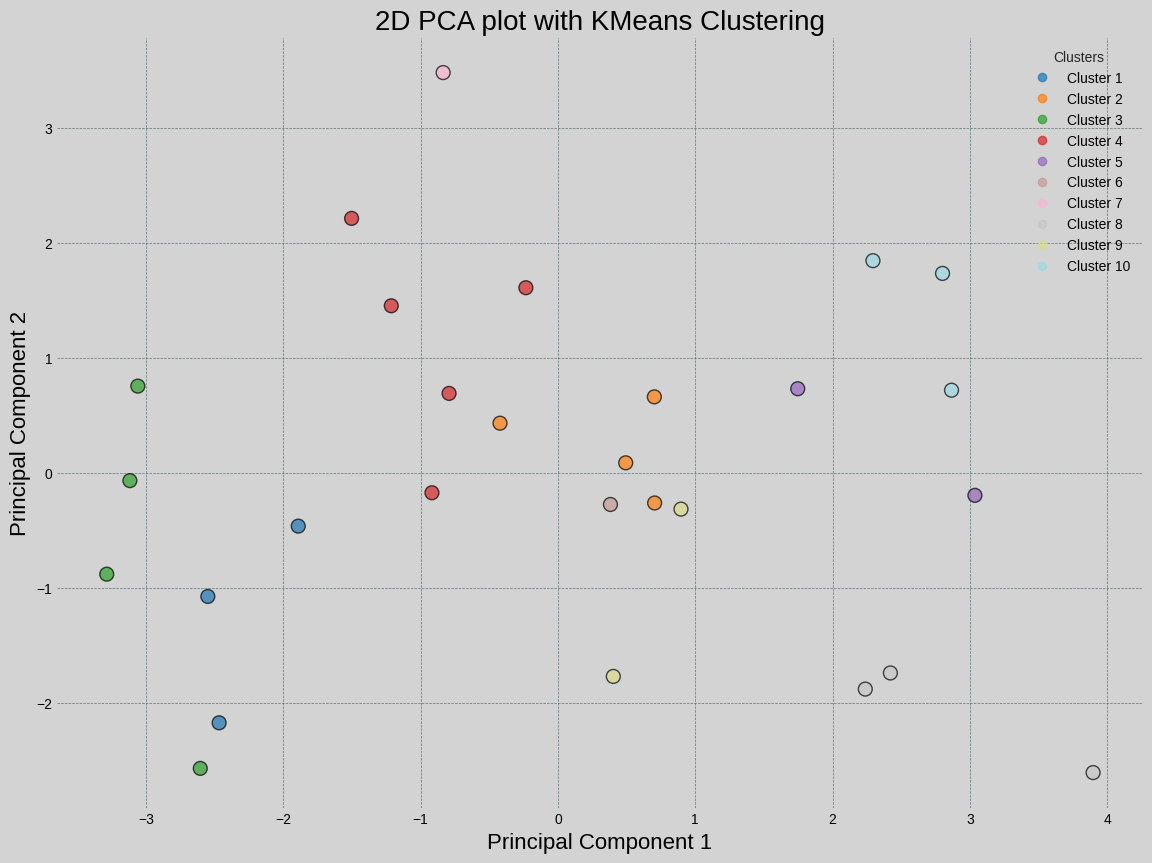

In [173]:
#Plotting the Scatter plot
pca_df['Cluster'] = pca_df['Cluster'] + 1
light_grey = '#D3D3D3'
dark_grey = '#2F4F4F'

fig, ax = plt.subplots(figsize=(14, 10), facecolor=light_grey)
ax.set_facecolor(light_grey)

scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='tab20', s=100, edgecolor='black', alpha=0.7)

ax.set_title('2D PCA plot with KMeans Clustering', fontsize=20, color='black')
ax.set_xlabel('Principal Component 1', fontsize=16, color='black')
ax.set_ylabel('Principal Component 2', fontsize=16, color='black')
ax.grid(True, color=dark_grey, linestyle='--', linewidth=0.5, alpha=0.7)

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters", loc='upper right')
legend1.get_frame().set_facecolor('white')


new_labels = ['Cluster {}'.format(i) for i in range(1, 11)]
for i, text in enumerate(legend1.get_texts()):
    text.set_text(new_labels[i])
plt.setp(legend1.get_texts(), color='black')

for spine in ax.spines.values():
    spine.set_edgecolor('black')

ax.tick_params(colors='black', which='both')

plt.show()



In [174]:
#Manual adjustment of clusters obtained after kmeans to ensure skill clusters are distributed using domain knowledge and PCA plot - with 3 skills for courses except 1 course (Justified in Report)
clust_skills_kmeans = {}
clust_skills_kmeans[0] = ['Python', 'Numpy', 'Pandas','Machine Learning']
clust_skills_kmeans[1] = ['Power BI', 'Data Visualization', 'Tableau', 'Creativity','SQL']
clust_skills_kmeans[2] = ['R','Statistical Analysis','Mathematical Optimization']
clust_skills_kmeans[3] = ['Big Data','Spark','Data Engineering','Hadoop']
clust_skills_kmeans[4] = ['Pytorch','TensorFlow','Deep Learning','Natural Language Processing']
clust_skills_kmeans[5] = ['Project Management', 'Excel','Presentation Skills']
clust_skills_kmeans[6] = ['Teamwork', 'Consulting']
clust_skills_kmeans[7] = ['Leadership', 'Problem Solving', 'Communication']



#ChatGPT prompt Analysis for Cluster Interpretation for K-Means - Not required as per TA's piazza post - but have included - in Report only hierarchical (selected) results are present

In [175]:
#preparing course clusters for input to chatGPT's model
'''input_skills_k = ''
for i in clust_skills_kmeans.keys():
    input_skills_k += 'Course ' + str(i+1) + ': ' + ', '.join(clust_skills_kmeans[i]) + '; '
input_skills_k = input_skills_k[:-2]
input_skills_k'''

"input_skills_k = ''\nfor i in clust_skills_kmeans.keys():\n    input_skills_k += 'Course ' + str(i+1) + ': ' + ', '.join(clust_skills_kmeans[i]) + '; '\ninput_skills_k = input_skills_k[:-2]\ninput_skills_k"

In [176]:
#Chat GPT Model execution for First Prompt Insights
'''data = {
    "model": "gpt-4",  # Confirming the use of a chat model
    "messages": [
        {"role": "user", "content": f"Based on the following courses, give me a short description of my course curriculum that entices potential students to enroll in this program. Limit the output to  70 words:{input_skills_k}"}
    ],
    "temperature": 0.7,
    "max_tokens": 500,
    "top_p": 1.0,
    "frequency_penalty": 0.8,
    "presence_penalty": 0.0
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=data)

if response.status_code == 200:
    print(response.json()["choices"][0]["message"]["content"])
else:
    print("Error:", response.status_code, response.text)'''

'data = {\n    "model": "gpt-4",  # Confirming the use of a chat model\n    "messages": [\n        {"role": "user", "content": f"Based on the following courses, give me a short description of my course curriculum that entices potential students to enroll in this program. Limit the output to  70 words:{input_skills_k}"}\n    ],\n    "temperature": 0.7,\n    "max_tokens": 500,\n    "top_p": 1.0,\n    "frequency_penalty": 0.8,\n    "presence_penalty": 0.0\n}\n\nresponse = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=data)\n\nif response.status_code == 200:\n    print(response.json()["choices"][0]["message"]["content"])\nelse:\n    print("Error:", response.status_code, response.text)'

In [177]:
#Chat GPT Model execution for Second Prompt Insights
'''data = {
    "model": "gpt-4",  # Confirming the use of a chat model
    "messages": [
        {"role": "user", "content": f"Help me understand how each of these clustered courses complement each other that it makes it into an effective course curriculum. Give me 8 bullet points with each no longer than 20 words:{input_skills_k}"}
    ],
    "temperature": 0.7,
    "max_tokens": 500,
    "top_p": 1.0,
    "frequency_penalty": 0.8,
    "presence_penalty": 0.0
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=data)

if response.status_code == 200:
    print(response.json()["choices"][0]["message"]["content"])
else:
    print("Error:", response.status_code, response.text)'''

'data = {\n    "model": "gpt-4",  # Confirming the use of a chat model\n    "messages": [\n        {"role": "user", "content": f"Help me understand how each of these clustered courses complement each other that it makes it into an effective course curriculum. Give me 8 bullet points with each no longer than 20 words:{input_skills_k}"}\n    ],\n    "temperature": 0.7,\n    "max_tokens": 500,\n    "top_p": 1.0,\n    "frequency_penalty": 0.8,\n    "presence_penalty": 0.0\n}\n\nresponse = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=data)\n\nif response.status_code == 200:\n    print(response.json()["choices"][0]["message"]["content"])\nelse:\n    print("Error:", response.status_code, response.text)'